In [1]:
"""
July 7, 2020

Looking at results of the MCMCs.
"""

import ares
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import distpy

In [2]:
# Independent variables
redshifts = np.sort(np.array([0.35, 0.875, 1.125, 1.75, 2.25, 2.75]))

Ms = np.linspace(7, 12, 60)

# blob 1: the smf
blob_n1 = ['galaxy_smf']
blob_i1 = [('z', redshifts), ('logbins', Ms)]
blob_f1 = ['StellarMassFunction']

In [13]:
# anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_06_08_12-01_0.0-3.0')
# anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_07_08_06-58_0.0-3.0') #ex1 - model4

anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_07_08_08-19_0.0-3.0') #new functs , ex2 - model1

# anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_07_08_11-28_0.0-3.0') #new funct and best fit SMF dpl
# anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_07_08_12-38_0.0-3.0') #new funct and best fit SMF dpl, bigger priors - bad

# anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_10_08_09-49_0.0-3.0') #all dpl new funct

# anl = ares.analysis.ModelSet('..\Cedar\savedFits/sf_smf_10_08_13-18_0.0-3.1')
# anl = ares.analysis.ModelSet('..\Cedar\savedFits/all_smf_11_08_09-08_0.0-3.0')


labels = \
{
     #A
    'pq_func_par0[7]': '$a_0$', #const
    'pq_func_par1[7]': '$a_1$', #offset
    'pq_func_par2[7]': '$a_2$', #m

    #B
    'pq_func_par0[8]': '$b_0$', #const
    'pq_func_par1[8]': '$b_1$', #offset
    'pq_func_par2[8]': '$b_2$', #m

    #C
    'pq_func_par0[9]': '$c_0$', #const
    'pq_func_par2[9]': '$c_2$',

    #D
    'pq_func_par0[10]': '$d_1$', #const
    'pq_func_par2[10]': '$d_2$',

}

anl.custom_labels = labels

# anl.skip = 128*50


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ..\Cedar\savedFits/                                                                    ####
#### prefix      : sf_smf_07_08_08-19_0.0-3.0                                                             ####
#### N-d         : 8                                                                                      ####


In [27]:
# data = anl.ExtractData(['galaxy_smf_Q'])
# print(data['galaxy_smf'])
# print(data['galaxy_sfrd'][0])

# print(data)

# Loading ..\Cedar\savedFits/sf_smf_07_08_08-19_0.0-3.0.dd*.chain.pkl...
# Loaded ..\Cedar\savedFits/sf_smf_07_08_08-19_0.0-3.0.dd*.chain.pkl in 0.23 s.
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0000.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0001.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0002.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0003.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0004.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0005.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0006.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0007.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.dd0008.blob_2d.galaxy_smf_sf.pkl
# Loaded ..\Cedar\savedFits\sf_smf_07_08_08-19_0.0-3.0.

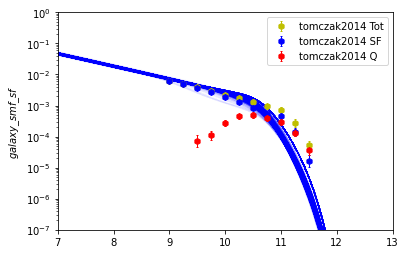

In [14]:
#look at the raw LF samples

z = 1.75

gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_smf_sf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
# gpop.PlotSMF(z, ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="y", ecolor='y', mec='y', label="tomczak2014 Tot", quantity="smf_tot", ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014",  label="tomczak2014 SF", color="b", ecolor='b',  mec='b', ax=ax, round_z=0.2, log10Mass=True)
gpop.PlotSMF(z, sources="tomczak2014", color="r", ecolor='r',  mec='r', label="tomczak2014 Q", quantity="smf_q", ax=ax, round_z=0.2, log10Mass=True)

# ax.set_ylim(1e-35, 1)
# ax.set_xlim(1e7, 1e13)

ax.legend()
pl.show()

In [15]:
# for ex1
# params = \
# [
#      #A
#     'pq_func_par0[7]',
#     'pq_func_par1[7]',
#     'pq_func_par2[7]', 

#     #B
#     'pq_func_par0[8]',
#     'pq_func_par1[8]', 
#     'pq_func_par2[8]',

#     #C
#     'pq_func_par0[9]',
#     #D
#     'pq_func_par0[10]', 
# ]

params = \
[
     #A
    'pq_func_par0[7]',
#     'pq_func_par1[7]',
    'pq_func_par2[7]', 

    #B
    'pq_func_par0[8]',
#     'pq_func_par1[8]', 
    'pq_func_par2[8]',

    #C
    'pq_func_par0[9]',
    'pq_func_par2[9]',
    #D
    'pq_func_par0[10]', 
    'pq_func_par2[10]', 
]

# print(anl.nwalkers)

# Loading ..\Cedar\savedFits/sf_smf_10_08_09-49_0.0-3.0.dd*.chain.pkl...
# Loaded ..\Cedar\savedFits/sf_smf_10_08_09-49_0.0-3.0.dd*.chain.pkl in 0.77 s.
0 of 51200 chain elements ignored because of chain links with inf's/nan's.


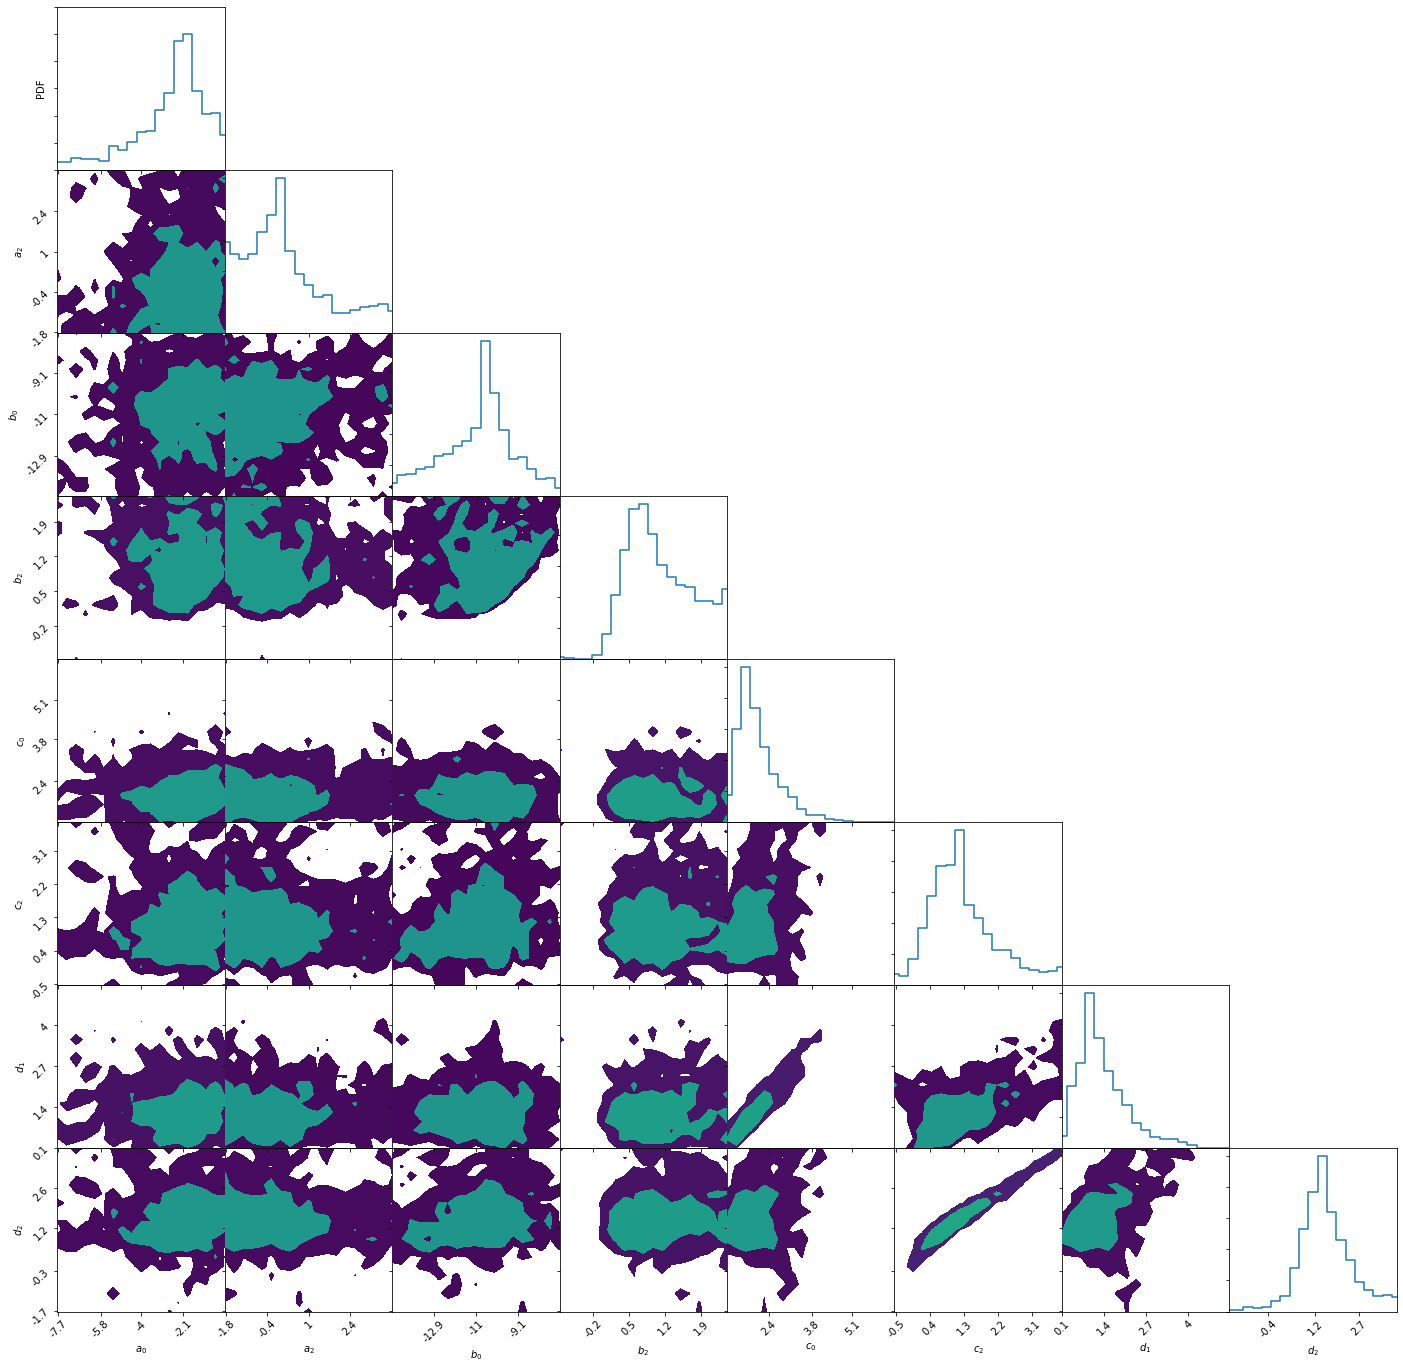

In [5]:
trig = anl.TrianglePlot(pars=params, color_by_like=True)

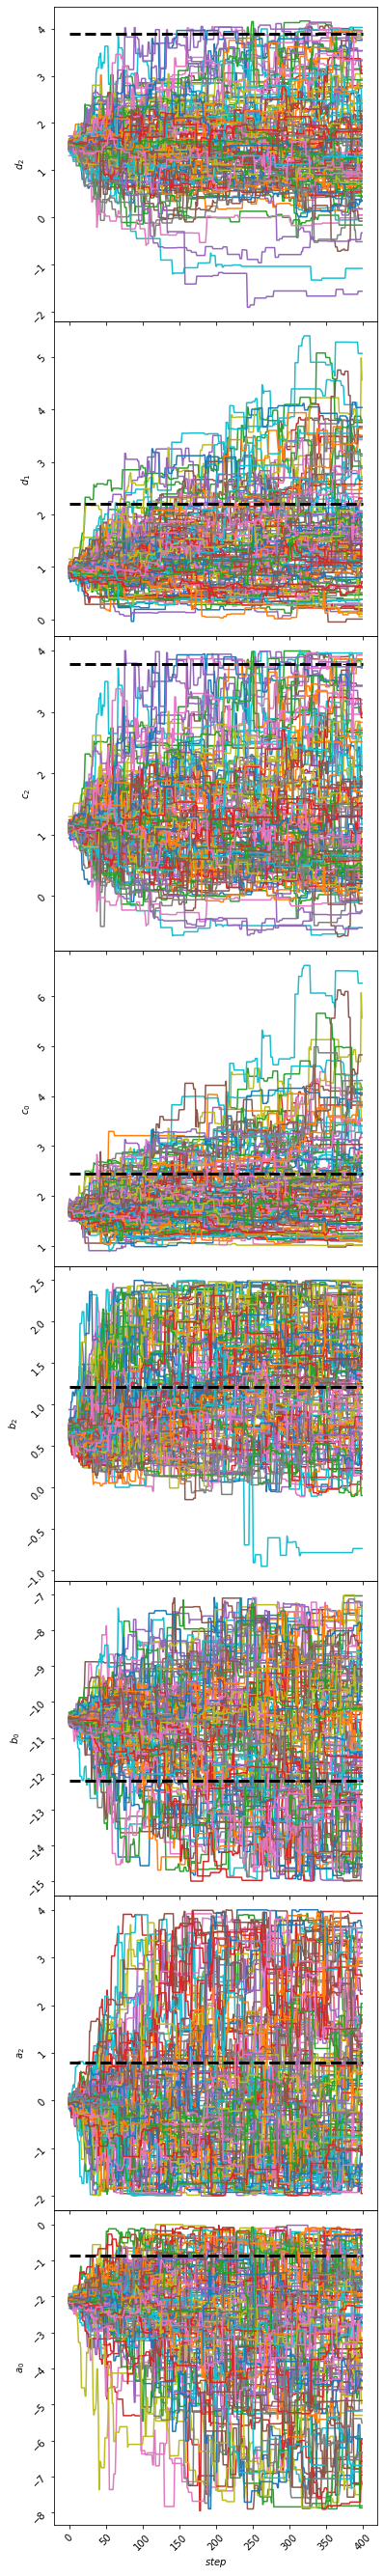

In [6]:
anl.WalkerTrajectoriesMultiPlot(best_fit='mode')

In [16]:
# print(anl.max_likelihood_parameters())

covar = anl.CovarianceMatrix(params)

In [17]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[params[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model3")

pars_mean.update(pars_ch, pop_sf_type='sf')
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [18]:
fit_best_like = anl.max_likelihood_parameters()

fit_best_median = anl.max_likelihood_parameters()

# print(fit_best_like)

for i in range(len(covar[0])):
#     print(fit_best_like[params[i]])
    print(anl.get_1d_error(params[i], peak="mode")) #(maximum likelihood value, positive error, negative error).
#     print(params[i], anl.get_1d_error(params[i], peak="mode")[0])
    fit_best_median[params[i]] = anl.get_1d_error(params[i], peak="median")[0]


(-1.1847036287831372, array([-0.14006275,  0.36138203]))
(0.41859919954205005, array([-0.2784654,  0.4665477]))
(-10.70135313806234, array([ 0.46916561, -0.25399434]))
(-0.022495626306877965, array([ 0.04962925, -0.02162471]))
(1.7148405951932986, array([ 0.28407206, -0.11868902]))
(0.8788516704318952, array([-0.2428872 ,  0.39026312]))
(0.5368355259379274, array([ 0.56978578, -0.38459444]))
(0.9642440270517514, array([-0.33830796,  0.48770354]))


In [19]:
pars_best = ares.util.ParameterBundle("emma:model3")

# print(fit_best_like)

pars_best.update(fit_best_like, pop_sf_type='sf')
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)


In [ ]:
# z = 0.875
z = 1.75

fig, ax = pl.subplots(figsize=(8, 5))
Ms_short = np.linspace(7, 12, 80)

ls_best = pop_best.StellarMassFunction(z, Ms_short, sf_type='smf_sf')
ls_best_t = pop_best.StellarMassFunction(z, Ms_short, sf_type='smf_tot')
ls_best_q = pop_best.StellarMassFunction(z, Ms_short, sf_type='smf_q')

# print(ls_best)

# ls_mean = pop_mean.StellarMassFunction(z, Ms_short, sf_type='smf_sf')

ax = anl.ReconstructedFunction('galaxy_smf_sf', ivar=[z, None], samples='all', color='lightskyblue', alpha=0.01, ax=ax)
ax = anl.ReconstructedFunction('galaxy_smf_q', ivar=[z, None], samples='all', color='peachpuff', alpha=0.01, ax=ax)
# ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='lemonchiffon', alpha=0.01, ax=ax)

obslf = ares.analysis.GalaxyPopulation()
# obslf.PlotSMF(z=z, ax=ax, round_z=0.2, log10Mass=True)
obslf.PlotSMF(z, sources="tomczak2014", color="y", ecolor='y', mec='y', label="tomczak2014 Tot", quantity="smf_tot", ax=ax, round_z=0.2, log10Mass=True)
obslf.PlotSMF(z, sources="tomczak2014",  label="tomczak2014 SF", color="b", ecolor='b',  mec='b', ax=ax, round_z=0.2, log10Mass=True)
obslf.PlotSMF(z, sources="tomczak2014", color="r", ecolor='r',  mec='r', label="tomczak2014 Q", quantity="smf_q", ax=ax, round_z=0.2, log10Mass=True)

pl.semilogy(Ms_short, ls_best, label='Best fit sf', color='navy', ls="--")
pl.semilogy(Ms_short, ls_best_t, label='total', color='goldenrod', ls="--")

pl.semilogy(Ms_short, ls_best_q, label='Best fit q', color='firebrick', ls="--")

# pl.semilogy(Ms_short, ls_mean, label='Mean fit')

pl.title("z = %.2f" %z)
pl.xlabel("log$_{10}$(m / M$_o$)")
pl.ylabel('$\phi(M_*)$ [dex$^{-1}$cMpc$^{-3}$]')
pl.legend()
# pl.ylim(1e-15, 1e2)
pl.show()

In [ ]:
bests = [anl.get_1d_error(i, nu=0.68,  peak='mode') for i in params]
means = [anl.get_1d_error(i, nu=0.68,  peak='median') for i in params]
fit_best_like 

i = 0
print(bests[i])

# anl.get_1d_error(params[i], peak="median")

pars = ares.util.ParameterBundle("emma:model2")

print(fit_best_like[params[i]])
# pars_mean[params[i]]

ax = anl.PosteriorPDF(pars=params[i])

# pl.axvline(x=fit_best_like[params[i]], ls="-", color="red", label="Best Fit in range")

#best fit with mode
pl.axvline(x=bests[i][0], ls="-", color="green", label="Best Fit")
ax.axvspan(bests[i][0]-bests[i][1][1], bests[i][0]+bests[i][1][0], alpha=0.2, color='green' ,label="68% error")

#best fit with mode
# pl.axvline(x=bests_m[i][0], ls="-", color="purple", label="Best Fit Med")
# ax.axvspan(bests_m[i][0]-bests_m[i][1][1], bests_m[i][0]+bests_m[i][1][0], alpha=0.2, color='purple' ,label="68% error")

pl.axvline(x=means[i][0], ls="--", color="black", label="Mean Fit",  alpha=0.4)

pl.legend()
pl.show()

In [ ]:
fig, ax = pl.subplots(figsize=(8, 5))

fract = pop_best._SF_fraction_PQ(sf_type='smf_sf')

# z = 0.875
z = 1.75
print(fract(z=z, Sh=pop_best.SMHM(z, 0)))

pl.axvspan(10**8, 10**12, alpha=0.2)
pl.semilogx(pop_best.SMHM(z, 0), fract(z=z, Sh=pop_best.SMHM(z, 0)))
pl.semilogx(pop_best.SMHM(z, 0), 1-fract(z=z, Sh=pop_best.SMHM(z, 0)))
pl.axhspan(0, 1, alpha=0.2, color="y")

pl.xlim(1e6, 1e13)
pl.ylim(-0.2, 1.2)

pl.show()

In [20]:
# ticks = np.linspace(0, len(anl.logL)-1, len(anl.logL))

# xstart = 30000

# maxL = anl.logL[31549]

# # print(anl.logL[35314])
# # print(anl.logL[1344-10:1344+10])

# pl.axvline(x=31549, color="yellow", label=str(maxL))

# pl.plot(ticks[xstart:], anl.logL[xstart:])
# pl.plot(ticks, anl.logL)
# pl.ylabel("logLikelihood")

# # pl.ylim(-500, 1500)
# pl.legend()
# pl.show()